<a href="https://colab.research.google.com/github/Charithareddy22/charithareddy/blob/main/Aggregation_%26_grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Day_9_banking_data.csv")

In [ ]:
#Data Exploration
print(df.head())

         Date       Account_Type    Branch Transaction_Type  \
0  2023-01-19      Fixed Deposit   Central     Loan Payment   
1  2023-01-16            Current    Uptown       Withdrawal   
2  2023-01-10            Current    Uptown     Loan Payment   
3  2023-01-18            Savings    Uptown     Loan Payment   
4  2023-01-14  Recurring Deposit  Suburban     Loan Payment   

   Transaction_Amount  Account_Balance  
0              985.51          6839.59  
1              641.43          8908.39  
2             3363.85         12428.67  
3             1914.60          5776.63  
4             2788.57          4779.04  


In [ ]:
print(df.describe())

       Transaction_Amount  Account_Balance
count           20.000000        20.000000
mean          2705.829500      7967.766500
std           1429.829787      2770.248821
min            641.430000      2592.160000
25%           1482.085000      6460.127500
50%           2567.645000      7905.275000
75%           4121.525000      9127.702500
max           4683.640000     12836.510000


In [ ]:

# Check for missing values
print(df.isnull().sum())

Date                  0
Account_Type          0
Branch                0
Transaction_Type      0
Transaction_Amount    0
Account_Balance       0
dtype: int64


In [ ]:
#Data Aggregation and grouping
# Total sum of Transaction_Amount per Account_Type
total_transaction_by_type = df.groupby("Account_Type")["Transaction_Amount"].sum()
print(total_transaction_by_type)

# Average Account_Balance per Account_Type
average_balance_by_type = df.groupby("Account_Type")["Account_Balance"].mean()
print(average_balance_by_type)


Account_Type
Current              15052.57
Fixed Deposit        14102.59
Recurring Deposit    15179.99
Savings               9781.44
Name: Transaction_Amount, dtype: float64
Account_Type
Current              9893.404000
Fixed Deposit        6120.380000
Recurring Deposit    7627.283333
Savings              9134.110000
Name: Account_Balance, dtype: float64


In [ ]:
# Total number of transactions per branch
transactions_per_branch = df.groupby("Branch")["Transaction_Amount"].count()
print(transactions_per_branch)

# Average Transaction_Amount per branch
average_transaction_per_branch = df.groupby("Branch")["Transaction_Amount"].mean()
print(average_transaction_per_branch)


Branch
Central     8
Downtown    3
Suburban    5
Uptown      4
Name: Transaction_Amount, dtype: int64
Branch
Central     2942.338750
Downtown    3188.703333
Suburban    2773.278000
Uptown      1786.345000
Name: Transaction_Amount, dtype: float64


In [9]:
#filtering data
filtered_df = df[df["Transaction_Amount"] <= 2000]
print(filtered_df)

          Date       Account_Type    Branch Transaction_Type  \
0   2023-01-19      Fixed Deposit   Central     Loan Payment   
1   2023-01-16            Current    Uptown       Withdrawal   
3   2023-01-18            Savings    Uptown     Loan Payment   
6   2023-01-04  Recurring Deposit   Central   Service Charge   
9   2023-01-11      Fixed Deposit  Downtown          Deposit   
10  2023-01-13  Recurring Deposit   Central          Deposit   
11  2023-01-08      Fixed Deposit  Suburban   Service Charge   
12  2023-01-15      Fixed Deposit    Uptown   Service Charge   
18  2023-01-12  Recurring Deposit  Suburban   Service Charge   

    Transaction_Amount  Account_Balance  
0               985.51          6839.59  
1               641.43          8908.39  
3              1914.60          5776.63  
6              1621.82          6465.79  
9              1529.59          2592.16  
10              846.41          6443.14  
11             1803.88          6560.58  
12             1225.50 

In [10]:
loan_payment_df = df[(df["Transaction_Type"] == "Loan Payment") & (df["Account_Balance"] > 5000)]
print(loan_payment_df)


          Date       Account_Type   Branch Transaction_Type  \
0   2023-01-19      Fixed Deposit  Central     Loan Payment   
2   2023-01-10            Current   Uptown     Loan Payment   
3   2023-01-18            Savings   Uptown     Loan Payment   
7   2023-01-09            Current  Central     Loan Payment   
13  2023-01-05  Recurring Deposit  Central     Loan Payment   
17  2023-01-07            Current  Central     Loan Payment   

    Transaction_Amount  Account_Balance  
0               985.51          6839.59  
2              3363.85         12428.67  
3              1914.60          5776.63  
7              2346.72         10708.85  
13             4683.64          6762.43  
17             4116.52          9785.64  


In [11]:
#Data Transformation
uptown_transactions = df[df["Branch"] == "Uptown"]
print(uptown_transactions)


          Date   Account_Type  Branch Transaction_Type  Transaction_Amount  \
1   2023-01-16        Current  Uptown       Withdrawal              641.43   
2   2023-01-10        Current  Uptown     Loan Payment             3363.85   
3   2023-01-18        Savings  Uptown     Loan Payment             1914.60   
12  2023-01-15  Fixed Deposit  Uptown   Service Charge             1225.50   

    Account_Balance  
1           8908.39  
2          12428.67  
3           5776.63  
12          4224.47  


In [12]:
df["Transaction_Fee"] = df["Transaction_Amount"] * 0.02


In [13]:
df["Balance_Status"] = df["Account_Balance"].apply(lambda x: "High Balance" if x > 5000 else "Low Balance")


In [14]:
#Sorting Data
sorted_df = df.sort_values(by="Account_Balance", ascending=False)
print(sorted_df.head(10))


          Date       Account_Type    Branch Transaction_Type  \
15  2023-01-03            Savings  Suburban   Service Charge   
8   2023-01-20  Recurring Deposit  Downtown   Service Charge   
2   2023-01-10            Current    Uptown     Loan Payment   
7   2023-01-09            Current   Central     Loan Payment   
17  2023-01-07            Current   Central     Loan Payment   
1   2023-01-16            Current    Uptown       Withdrawal   
19  2023-01-17            Savings   Central          Deposit   
18  2023-01-12  Recurring Deposit  Suburban   Service Charge   
16  2023-01-02      Fixed Deposit   Central          Deposit   
14  2023-01-01      Fixed Deposit  Downtown       Withdrawal   

    Transaction_Amount  Account_Balance  Transaction_Fee Balance_Status  
15             3350.32         12836.51          67.0064   High Balance  
8              3899.98         12646.56          77.9996   High Balance  
2              3363.85         12428.67          67.2770   High Balance  

In [15]:
#Ranking Data
df["Transaction_Rank"] = df.groupby("Branch")["Transaction_Amount"].rank(method="dense", ascending=False)


In [16]:
import matplotlib.pyplot as plt

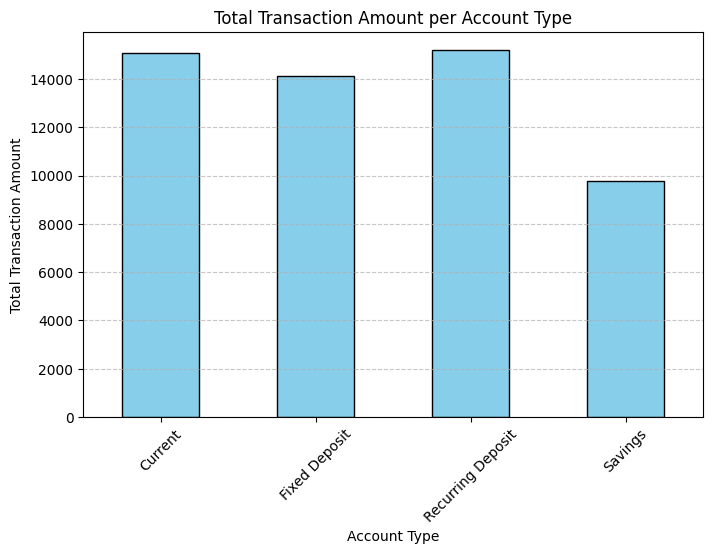

In [17]:
# Group by Account_Type and sum Transaction_Amount
transaction_sum_by_type = df.groupby("Account_Type")["Transaction_Amount"].sum()

# Plot bar chart
transaction_sum_by_type.plot(kind="bar", figsize=(8, 5), color="skyblue", edgecolor="black")
plt.title("Total Transaction Amount per Account Type")
plt.xlabel("Account Type")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


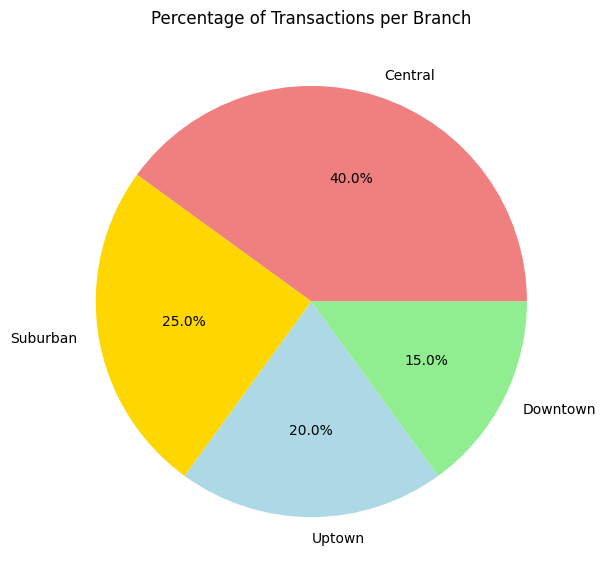

In [18]:
# Count number of transactions per Branch
transactions_per_branch = df["Branch"].value_counts()

# Plot pie chart
transactions_per_branch.plot(kind="pie", autopct="%1.1f%%", figsize=(7, 7), colors=["lightcoral", "gold", "lightblue", "lightgreen"])
plt.title("Percentage of Transactions per Branch")
plt.ylabel("")  # Hide y-label for better appearance
plt.show()
